# Introducció a OpenCV

En aquesta pràctica veurem algunes utilitats pràctiques d'OpenCV, centrant-nos el processat d'imatges.

Com a exemple anem a extreure els caràcters **braille** d'una imatge

Per començar carregarem algunes funcions bàsiques i crearem una funció d'utilitat per mostrar imatges.

In [13]:
from matplotlib import pyplot as plt
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

def mostrar_imatges(imatges, titols=None, tamany_font=12):
    """
    Funció per mostrar una llista d'imatges.
    """
    n=len(imatges)
    fig, axs = plt.subplots(1, n)
    for i, img in enumerate(imatges):
            axs[i].imshow(img)
            axs[i].axis('off')

            if titols is not None:
              axs[i].set_title(titols[i], fontsize=tamany_font)
    fig.set_size_inches(fig.get_size_inches()*n)
    plt.show()

## Carregant imatges

Quan carreguem imatges en opencv es sol utilitzar una representació com a arrays de NumPy; una dimensió per color.

D'aquesta manera, una imatge en B/N de `320X200` s'enmagatzemarà en un array de `200x320` i si és en color en un array `200x320x3`.

Carreguem la imatge inicial:

(242, 531, 3)


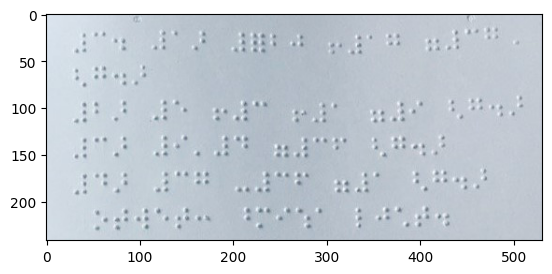

In [15]:
im = cv2.imread('braille.jpeg')
print(im.shape)
plt.imshow(im)

Podem veure el text en Braille. Com el que ens interessa no té que veure amb el color ho convertirem a B/N.

(242, 531)


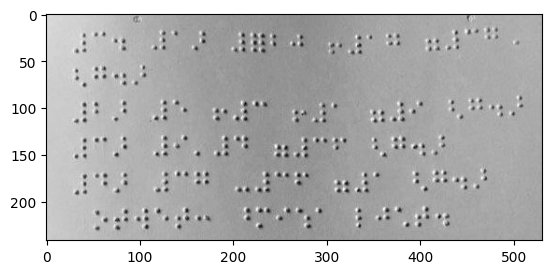

In [18]:
im_bn = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
print(im_bn.shape)
plt.imshow(im_bn, cmap='gray')

## Processem la imatge

Per poder classificar els caràcters (semblant al que hem fet en el dataset MNIST) primer haurem d'extreure els caràcters.

Podriem utilitzar la detecció d'objectes (que veurem en una altra pràctica) pero en aquesta pràctica ho farem utilitzant _visió per computador_ pura.

### Thresolding

El primer pas serà fer _thresolding_ (separar el fons del primer plà). En aquest [article](https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html) podem veure ben descrit el procediment.

In [ ]:
# En primer lloc emborronem la imatge per tal de reduir el soroll
im = cv2.blur(im_bn, (3, 3))

# Fem un thresholding per binaritzar la imatge, adaptant el threshold a cada píxel
# cv2.adaptiveThreshold: L'operació de thresholding s'aplica a cada píxel de la imatge, i el valor del threshold es calcula a partir dels valors dels píxels del veïnatge
# cv2.ADAPTIVE_THRESH_MEAN_C: el valor del threshold és la mitjana dels valors dels pixels del veïnatge
# cv2.THRESH_BINARY_INV: els pixels amb valor superior al threshold es posen a 0, els altres a 255
im = cv2.adaptiveThreshold(im, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                           cv2.THRESH_BINARY_INV, 5, 4)

# cv2.medianBlur: El medianBlur és un filtre que substitueix el valor de cada píxel per la mediana dels valors dels píxels del veïnatge
im = cv2.medianBlur(im, 3)

# cv2.threshold: aplica un threshold a la imatge
# cv2.THRESH_OTSU: el threshold es calcula automàticament
_,im = cv2.threshold(im, 0, 255, cv2.THRESH_OTSU)

# cv2.GaussianBlur: aplica un filtre gaussià a la imatge. 
im = cv2.GaussianBlur(im, (3,3), 0)
_,im = cv2.threshold(im, 0, 255, cv2.THRESH_OTSU)
plt.imshow(im)

El mètode més senzill és el _Simple Thresholding_ que simplement compara cada pixel amb un valor i el converteix en blanc o negre segons si és més gran o més petit. Aquest mètode és el més senzill i el més ràpid. UTilitzarem, però, el mètode _Adaptive Thresholding_ que ajusta el valor de _threshold_ segons la regió de la imatge.